#The Happiness Project 

We are going to explore the world happiness to see whether COVID-19 has an impact on happiness.Our data is dervied is Kaggle website: https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present

The report was taken from the world happiness report website, https://worldhappiness.report/, where annual reports are produced by the agency. 

In [200]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
 
#Read happiness report csv file
df = pd.read_csv('World_Happiness_Report.csv')

#iterate over variables from the dataset to fill in null values using linear regression model
for index, row in df.iterrows():
    #print(row)
    columns_to_fill = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices', 'Perceptions Of Corruption']
 
    for column in columns_to_fill:
        #print(column)
        if df[column].isnull().any():
            df_missing = df[df[column].isnull()]
         
            df_clean = df.dropna(subset=[column])
         
            X_train = df_clean[['Year']]
            y_train = df_clean[column]
         
            model = LinearRegression()
         
            model.fit(X_train, y_train)
         
            X_missing = df_missing[['Year']]
         
            y_missing = model.predict(X_missing)
         
            df.loc[df[column].isnull(), column] = y_missing
 
print(df.head())

  Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.

After reading the file and performing linear regression on numerical variables, we are going to check for null values in other variables by showcasing the missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2199 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2199 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2199 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

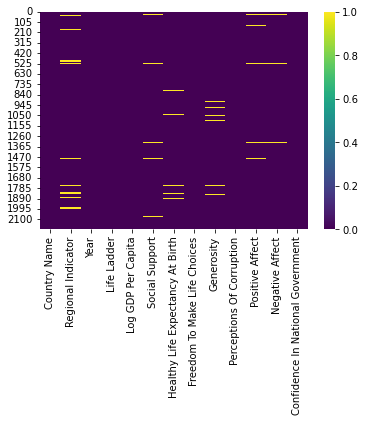

In [201]:

df.info()
df.isnull().values

df.isna().values.sum()
df.isna().sum().sum()
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)
sns.heatmap(missing_values, cmap='viridis')

df.describe()

df.columns

After checking the heatmap for null values, we needed to fill the null values with the corrected regions. So, we first tried to locate unique and null values in regional indicator column.


In [202]:
import re 

#get the unique values that are NA in regional

unique_values = []
df['R_checker'] = df['Regional Indicator'].isnull()

#print(df['R_checker'])

for i,row in df.iterrows():
    #print
    #country = row['Country Name']
    if row['R_checker']==True:
        unique_values.append(row['Country Name'])
    
#values = np.array(unique_values)
holder = np.unique(unique_values)

#print the unique values
print(np.unique(unique_values))


['Angola' 'Belize' 'Bhutan' 'Central African Republic' 'Congo (Kinshasa)'
 'Cuba' 'Czechia' 'Djibouti' 'Eswatini' 'Guyana' 'Oman' 'Qatar' 'Somalia'
 'Somaliland region' 'South Sudan' 'State of Palestine' 'Sudan' 'Suriname'
 'Syria' 'Trinidad and Tobago' 'Turkiye']


After cleaning the varaibles that we chose based on the literature review, we wanted to showcase the differences between each region life ladder and campre the differences between them.


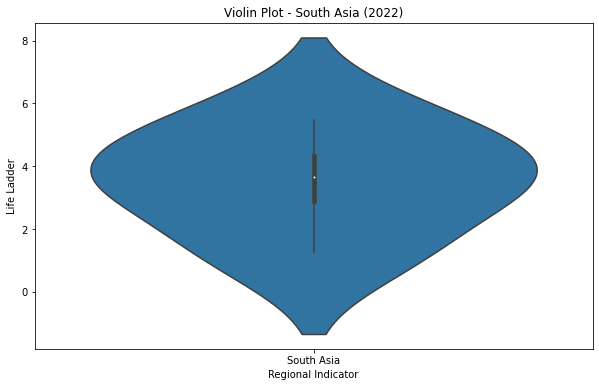

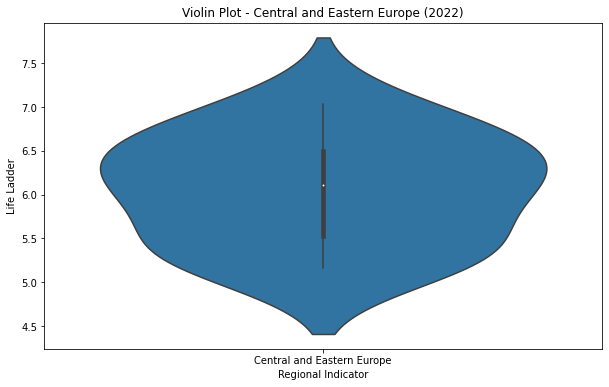

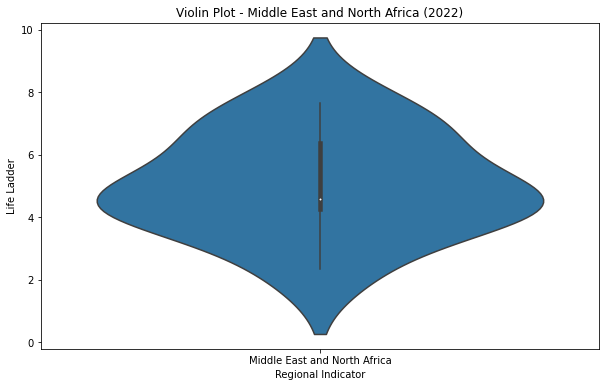

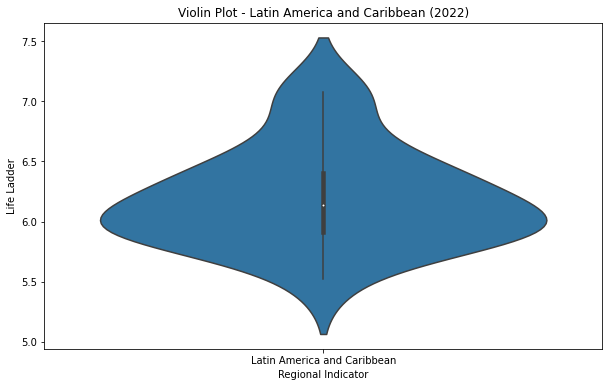

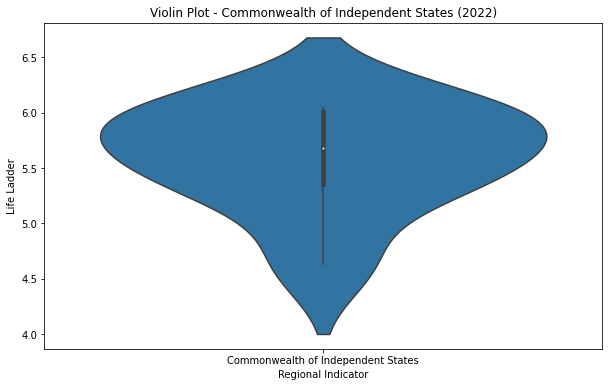

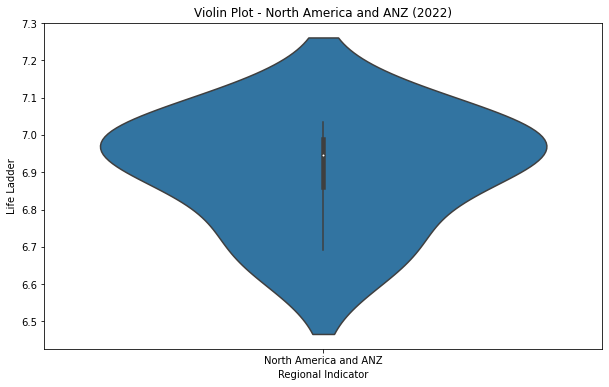

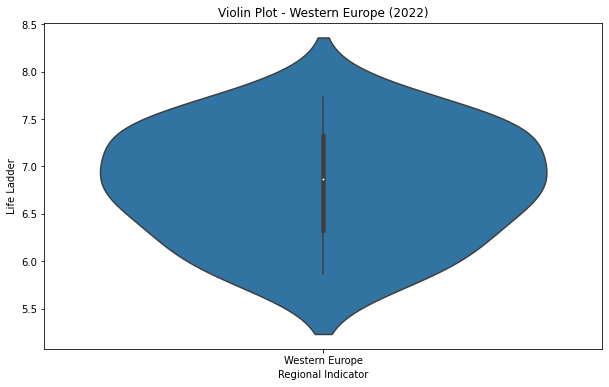

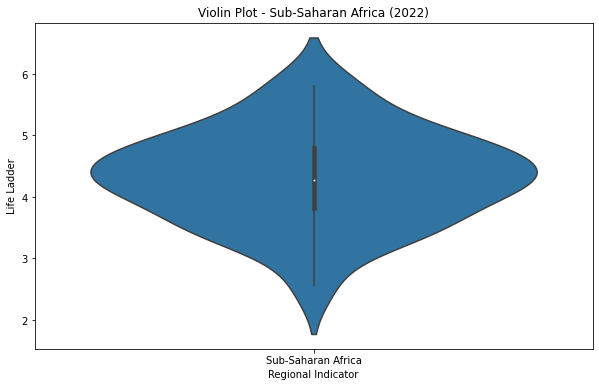

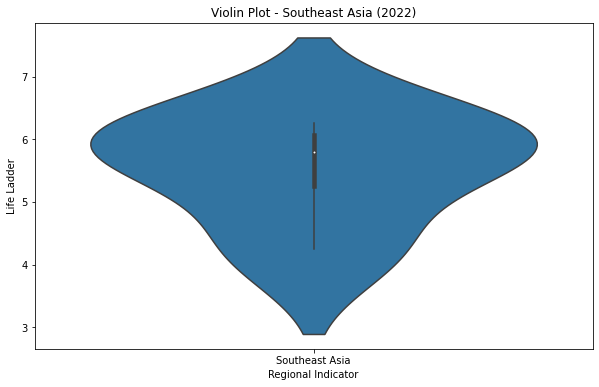

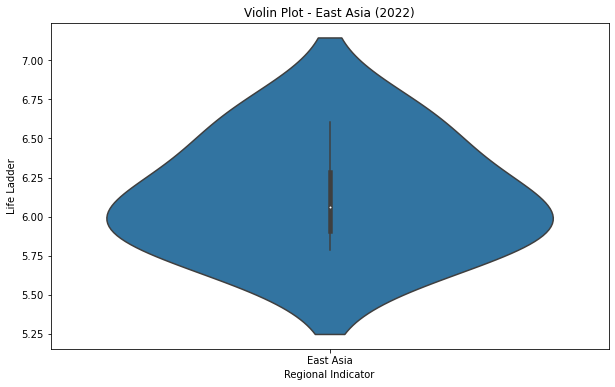

In [203]:


import seaborn as sns


# Iterate over unique values of 'Regional Indicator'
for regional_indicator in df['Regional Indicator'].unique():
    # Filter the data subset for the specific regional indicator and year 2022
    data_subset = df[(df['Regional Indicator'] == regional_indicator) & (df['Year'] == 2022)]
    
    # Proceed if the data subset is not empty
    if not data_subset.empty:
        # Create a new figure with a size of 10x6
        plt.figure(figsize=(10, 6))
        # Generate a violin plot using seaborn, with 'Regional Indicator' on the x-axis and 'Life Ladder' on the y-axis
        sns.violinplot(x='Regional Indicator', y='Life Ladder', data=data_subset)
        # Set the title of the plot, incorporating the regional indicator and year
        plt.title(f"Violin Plot - {regional_indicator} (2022)")
        # Set the x and y axis labels
        plt.xlabel('Regional Indicator')
        plt.ylabel('Life Ladder')
         # Display the plot
        plt.show()
       


Using the regional Violin plots, it would allows us to compare the distribution of a continuous variable across different regions. 

In [204]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure()

for regional_indicator in df['Regional Indicator'].unique():
    data_subset = df[(df['Regional Indicator'] == regional_indicator) & (df['Year'] == 2022)]
    
    if not data_subset.empty:
        fig.add_trace(go.Violin(x=data_subset['Regional Indicator'],
                                y=data_subset['Life Ladder'],
                                name=regional_indicator,
                                box_visible=True,
                                meanline_visible=True))

fig.update_layout(title="Violin Plot - Life Ladder by Regional Indicator (2022)",
                  xaxis_title="Regional Indicator",
                  yaxis_title="Life Ladder")

fig.show()

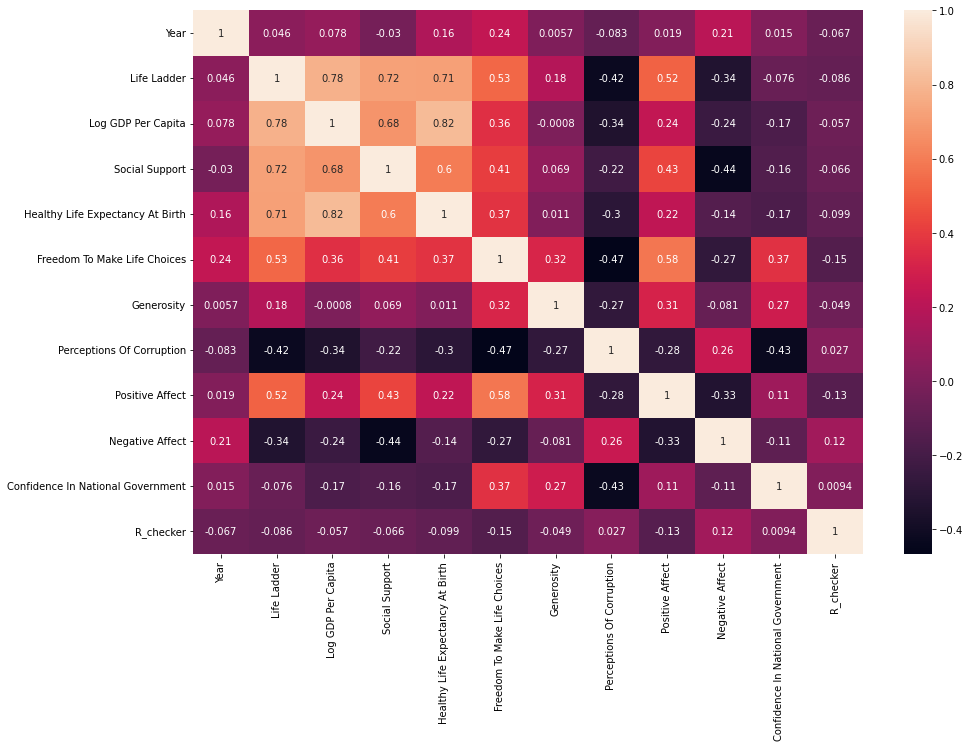

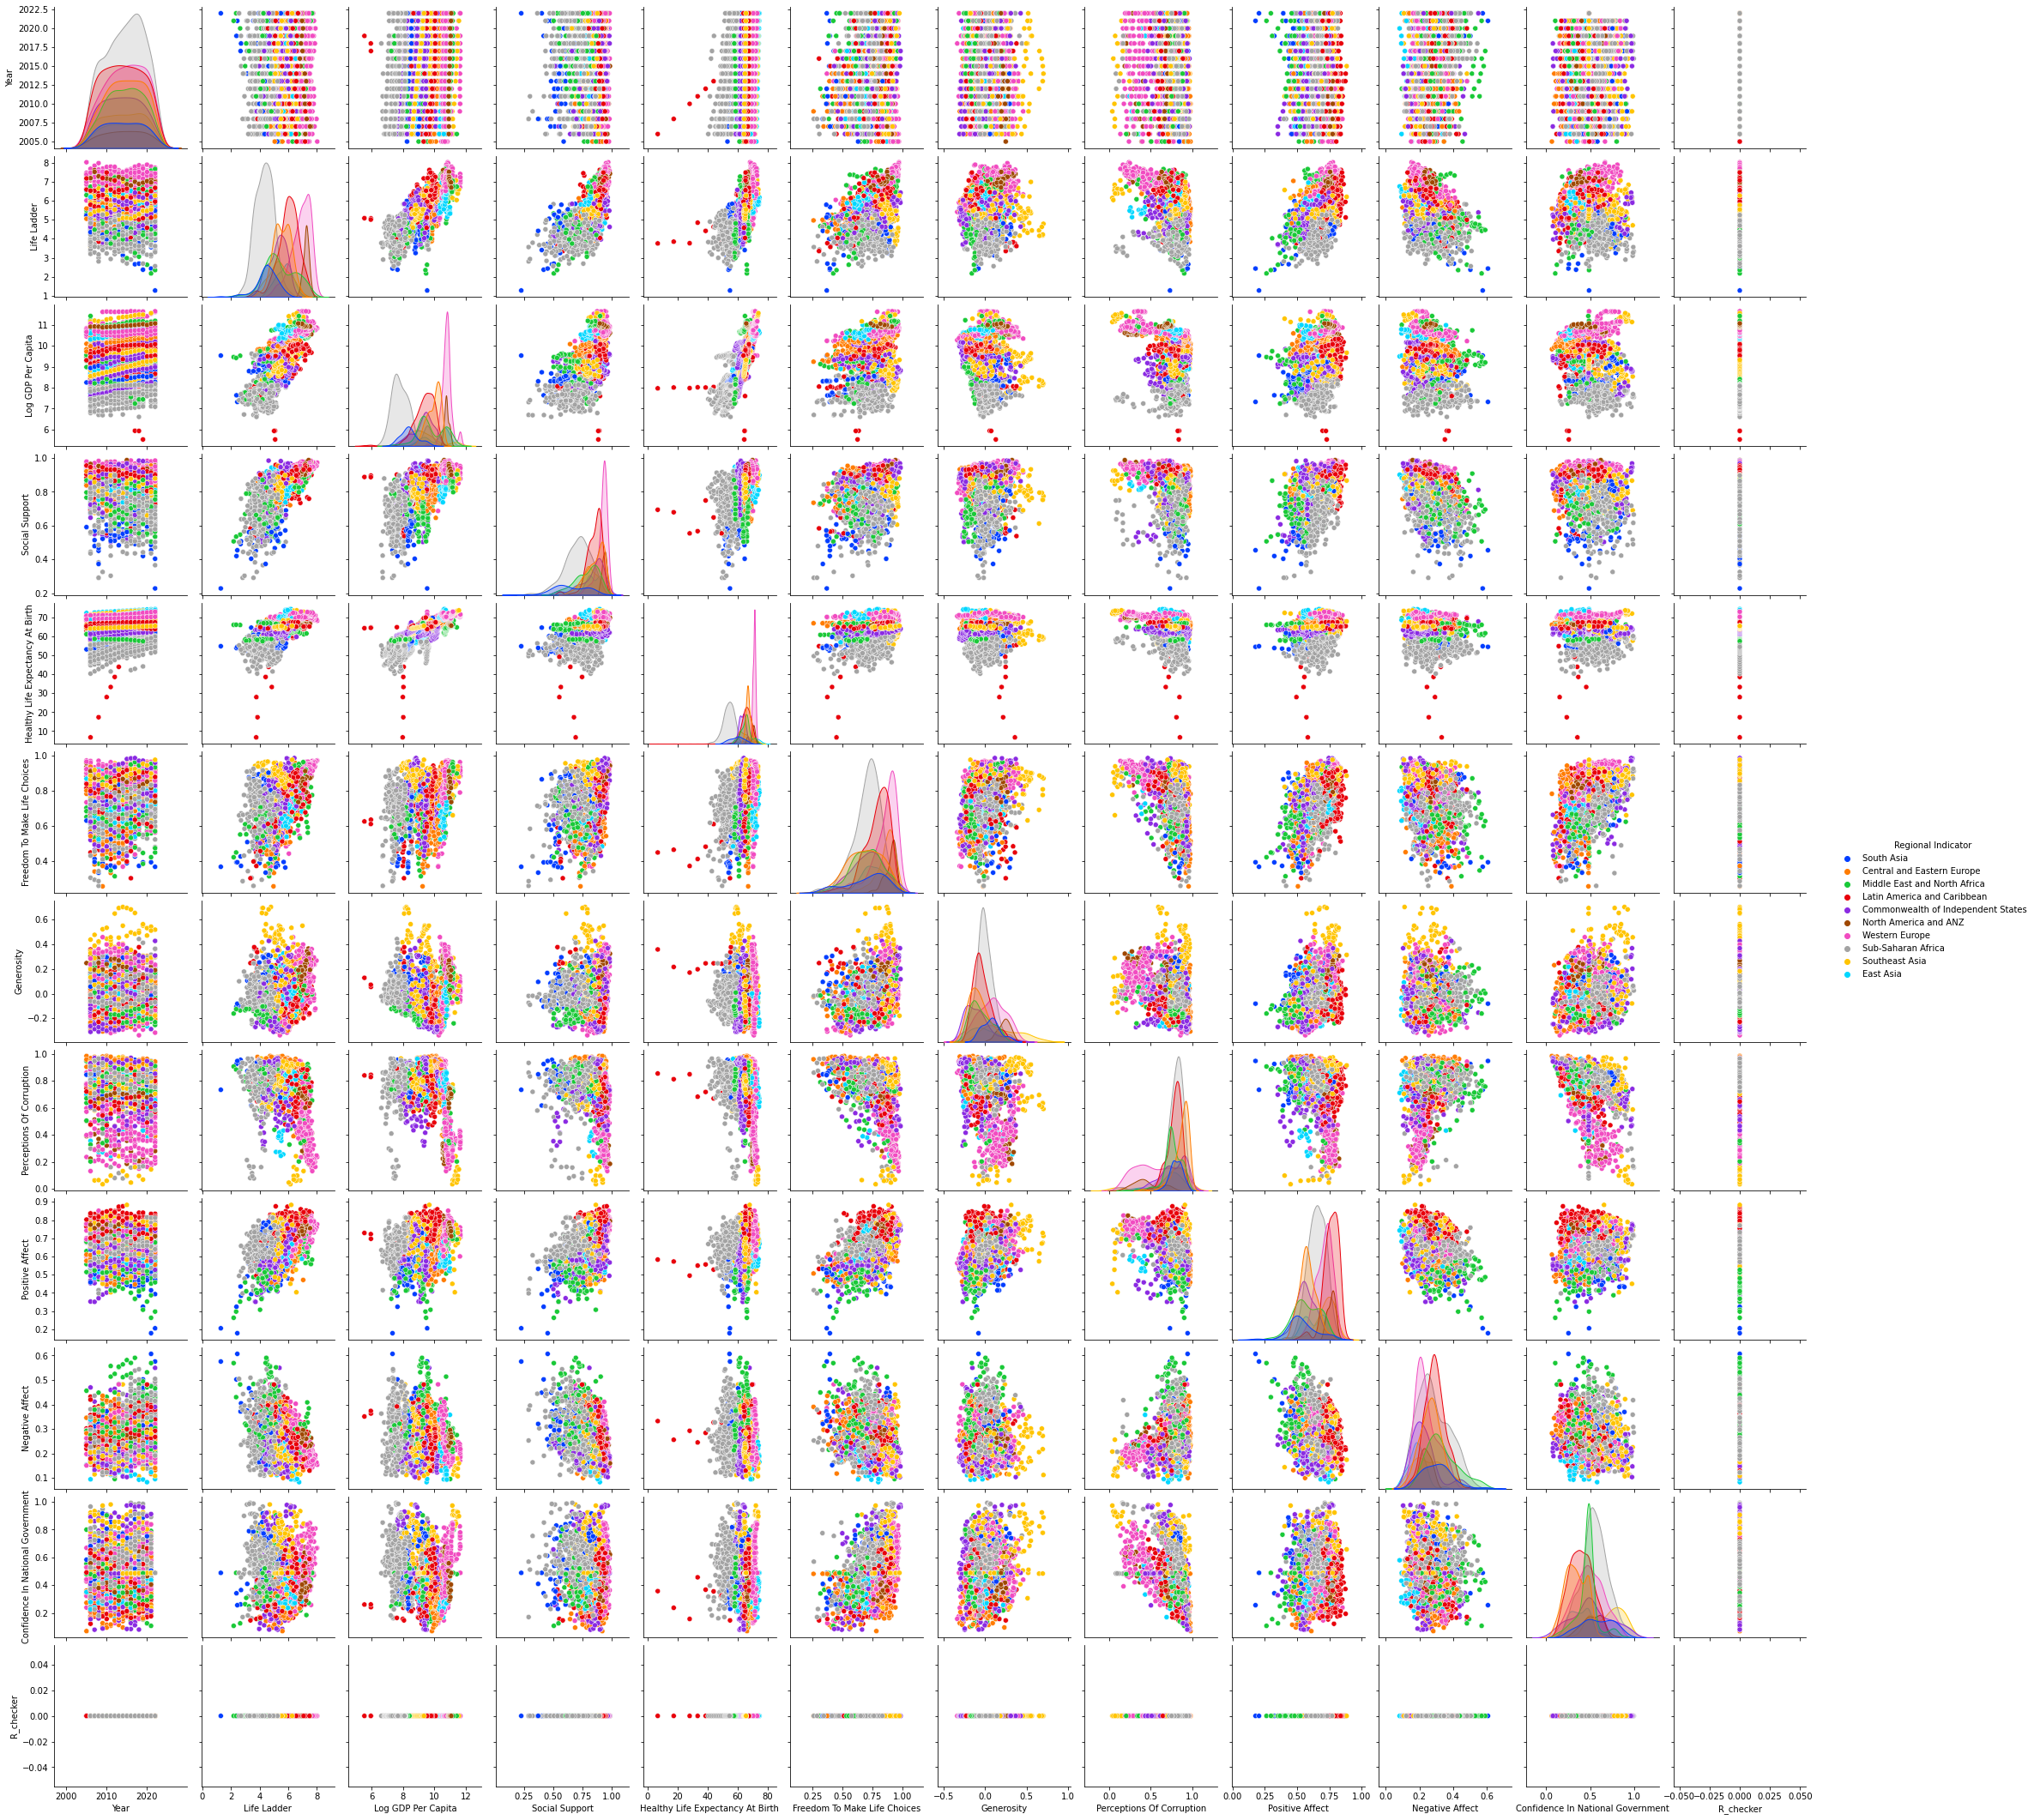

In [205]:
# Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar=True, annot=True)

# Pairplot

sns.pairplot(df, hue='Regional Indicator', palette='bright')
plt.show()

The word finder function below is necessary to search for country names and individually put the country to its respective region. Before implementing this code, Mexico was labeled to be a part of Latin America. This makes the regional indicators more accurate and more easily identifiable.


In [206]:

#word finder function 

def WordFinder(word, text):
    pattern = r'(^|[^\w]){}([^\w]|$)'.format(word)
    pattern = re.compile(pattern, re.IGNORECASE)
    matches = re.search(pattern, text)
    return bool(matches)


regionFilled = []

#assign all the na values to a region
for i,row in df.iterrows():
    regions = row['Regional Indicator']
    country = row['Country Name']
    
    if WordFinder('African',country) == True:
        #print(country)
        regions = 'Sub-Saharan Africa'
        #print(regins)
        regionFilled.append(regions)
        #print(regins)
    #print(regins)
    
    elif WordFinder('sudan',country) == True:
        regions = 'Sub-Saharan Africa'
        regionFilled.append(regions)
        #print(regins)
    elif WordFinder('angola',country) == True:
        regions = 'Sub-Saharan Africa'
        #print(regins)
        regionFilled.append(regions)
    elif WordFinder('Belize',country) == True:
        regions = 'Latin America and Caribbean'
        #print(regins)
        regionFilled.append(regions)
        
    elif WordFinder('Bhutan',country) == True:
        regions = 'South Asia'
        #print(regins)
        regionFilled.append(regions)
    elif WordFinder('Congo',country) == True:
        #print(country)
        regions = 'Sub-Saharan Africa'
        #print(regins)
        regionFilled.append(regions)
    elif WordFinder('Cuba',country) == True:
        regions = 'Latin America and Caribbean'
        #print(regins)
        regionFilled.append(regions)
    elif WordFinder('Czechia',country) == True:
        regions = 'Western Europe'
        #print(regins)
        regionFilled.append(regions)   
        
    elif WordFinder('Djibouti',country) == True:
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions)   
    elif WordFinder('Eswatini',country) == True:
        regions = 'Sub-Saharan Africa'
        #print(regins)
        regionFilled.append(regions)        
    elif WordFinder('Guyana',country) == True:
        regions = 'Latin America and Caribbean'
        #print(regins)
        regionFilled.append(regions)   
    elif WordFinder('Oman',country) == True:
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions) 
        
    elif WordFinder('Qatar',country) == True:
        #print(country)
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions) 
        
    elif WordFinder('somalia',country) == True:
        regions = 'Sub-Saharan Africa'
        #print(regins)
        regionFilled.append(regions) 
        
    elif WordFinder('Somaliland',country) == True:
        regions = 'Sub-Saharan Africa'
        regionFilled.append(regions) 
        #print(reginFilled)
    elif WordFinder('Palestine',country) == True:
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions) 

        
    elif WordFinder('Suriname',country) == True:
        regions = 'Latin America and Caribbean'
        #print(regins)
        regionFilled.append(regions)   
    elif WordFinder('Syria',country) == True:
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions) 
    elif WordFinder('trinidad',country) == True:
        regions = 'Latin America and Caribbean'
        #print(regins)
        regionFilled.append(regions) 
    elif WordFinder('turkiye',country) == True:
        regions = 'Middle East and North Africa'
        #print(regins)
        regionFilled.append(regions)   
    else:
        regionFilled.append(regions)
        
#print(len(reginFilled))

df['Regional Indicator'] = regionFilled

#check to make sure count of  na is 0

df['Regional Indicator'].isna().sum()


        


0

The code below is used to get the top three GDPs for each region for the year 2022. This is needed so the next chunks of code to produce the various plots and graphs.


In [207]:
#getting 3 countries by top GDP by region 

grouped_data = df.groupby(['Year', 'Regional Indicator'])

top_countries_list = []


for index, (group_name, group_data) in enumerate(grouped_data, start=1):
    
    top_countries = group_data.nlargest(3, 'Log GDP Per Capita')
    
    
    top_countries_list.append([index, group_name[0], top_countries])
    
#print(top_countries_list[0][2])



#added if statment to just print out the 2022 
    
for index, year, top_countries in top_countries_list:
    if year ==2022:
        print(f"Index: {index}")
        print(f"Year: {year}")
        print(top_countries)
    
        


Index: 168
Year: 2022
     Country Name          Regional Indicator  Year  Life Ladder  \
1751     Slovenia  Central and Eastern Europe  2022     6.723398   
1154    Lithuania  Central and Eastern Europe  2022     7.037577   
609       Estonia  Central and Eastern Europe  2022     6.357114   

      Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
1751           10.644165        0.941757                         71.224998   
1154           10.601837        0.937097                         67.750000   
609            10.571353        0.933333                         69.875000   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
1751                      0.930382    0.101481                   0.762208   
1154                      0.709662   -0.190842                   0.684991   
609                       0.903951    0.135742                   0.390301   

      Positive Affect  Negative Affect  Confidence In National Government  \
1751  

In [208]:
df['Year'] = df['Year']. astype(int)


pre_covid = df[(df['Year'] >= 2005) & (df['Year'] <= 2019)]
post_covid = df[(df['Year'] >= 2020) & (df['Year'] <= 2023)]



The code below displays a heatmap correlation matrix for pre-covid variables.


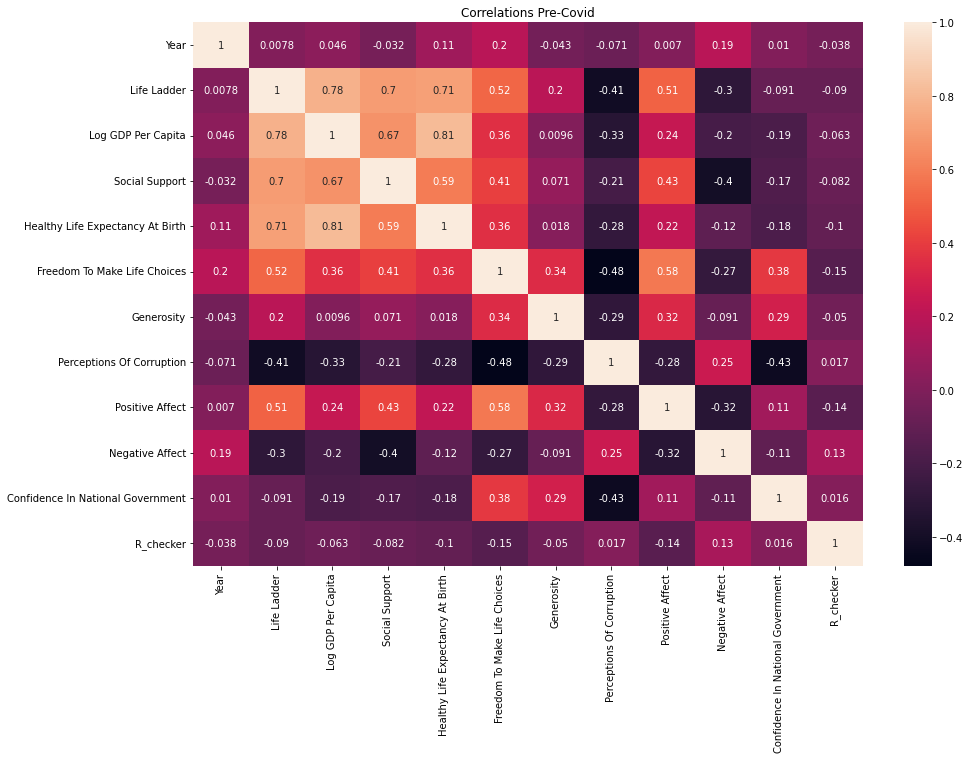

In [209]:
plt.figure(figsize=(15,10))
sns.heatmap(pre_covid.corr(), cbar=True, annot=True)
plt.title('Correlations Pre-Covid')
plt.show()

The code below displays a heatmap correlation matrix for post-covid variables.


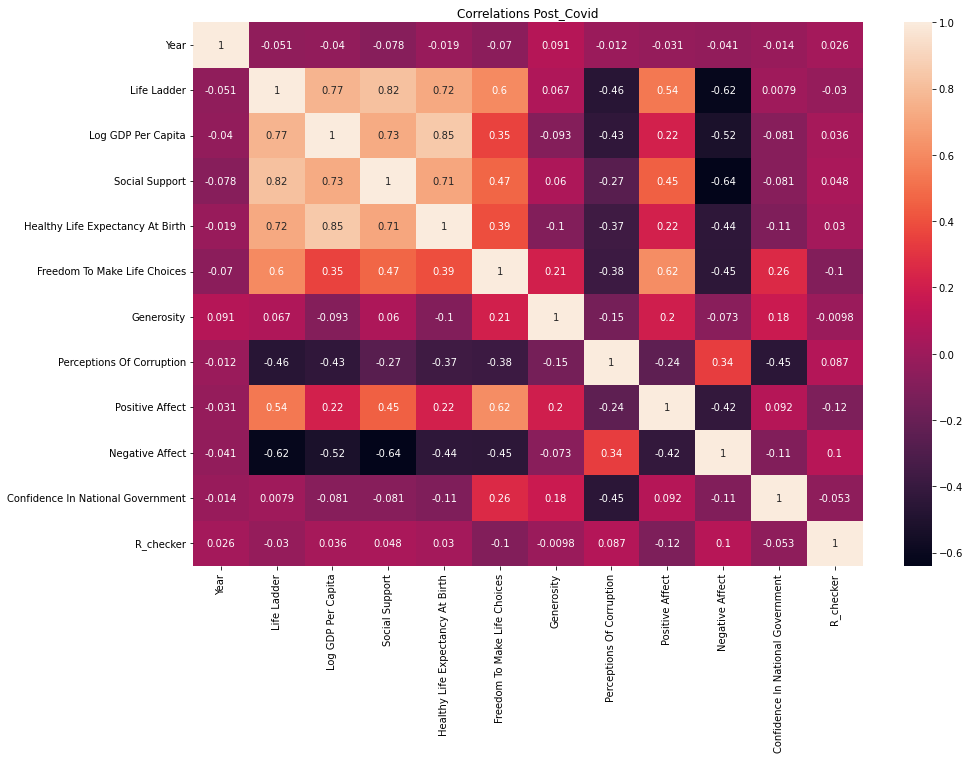

In [210]:
plt.figure(figsize=(15,10))
sns.heatmap(post_covid.corr(), cbar=True, annot=True)
plt.title('Correlations Post_Covid')
plt.show()

The code below shows the output for the bar graph for Central and Eastern Europe. These bar graphs compare pre-covid and post-covid Life Ladder values for the countries with the highest GDP in the Central and Eastern Europe region.


In [211]:
#Western Europe
#Pre-Covid

countries = ['Luxembourg','Ireland','Switzerland']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [181]:
#Sub-Saharan Africa
#Pre-Covid

countries = ['Mauritius','Botswana','Gabon']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [212]:
#Southeast Asia
#Pre-Covid

countries = ['Thailand', 'Indonesia','Vietnam']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [179]:
#South Asia
#Pre-Covid

countries = ['Afghanistan', 'India','Bangladesh']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [213]:
#North America and ANZ
#Pre-Covid

countries = ['United States', 'Australia','Canada']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [176]:
#Middle East and North Africa
#Pre-Covid

countries = ['United Arab Emirates', 'Saudi Arabia','Israel']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [214]:
#Latin America and Caribbean
#Pre-Covid

countries = ['Panama', 'Chile','Uruguay']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    

columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [215]:
#Central and Eastern Europe
#Pre-Covid

countries = ['Lithuania', 'Slovenia','Estonia']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    
    countries = ['Lithuania', 'Slovenia','Estonia']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [172]:
#Commonwealth of Independent States
#Pre-Covid

countries = ['Russia', 'Kazakhstan','Georgia']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    
    countries = ['Russia', 'Kazakhstan','Georgia']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

In [216]:
#East Asia
#Pre-Covid

countries = ['South Korea', 'Japan','Taiwan Province of China']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = pre_covid[pre_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Pre-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()
    
    #Post Covid 
    
#countries = ['Russia', 'Kazakhstan','Georgia']
columns = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices',
           'Perceptions Of Corruption']

for country in countries:
    country_data = post_covid[post_covid['Country Name'] == country]  # Fix the column name

    country_data = country_data.melt(id_vars='Country Name', value_vars=columns, var_name='Indicator',
                                     value_name='Value')

    fig = px.bar(country_data, x='Indicator', y='Value', title=f"Post-Covid Plot for {country}")
    fig.update_layout(xaxis=dict(tickangle=25))  # Rotate x-axis labels by 90 degrees

    fig.show()

This interactive sunburst plot was created using plotly to show the country's GDPs, Regional Indicator, and Life Ladder score from highest to lowest.


In [217]:
# sunburst plot for all
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Country Name', 'Regional Indicator', 'Year'],
    values='Life Ladder',
    color='Log GDP Per Capita',
    color_continuous_scale='Blues',
    hover_name='Country Name',
    hover_data=['Life Ladder', 'Log GDP Per Capita'],
    title='Life Ladder and Log GDP Per Capita by Country, Regional Indicator, and Year'
    )

fig.show()